Dataset: [Top Visited Websites](https://www.kaggle.com/datasets/thedevastator/the-top-websites-in-the-world)

This dataset consists of the top 50 most visited websites in the world, as well as the category and principal country/territory for each site. The data provides insights into which sites are most popular globally, and what type of content is most popular in different parts of the world.

In [37]:
#Import Section
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
!pip install pycountry
import pycountry
import seaborn as sb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The under part is about to load and processing the data. I just analyze the countries porportion and the counts in the top 50 popular websites.



The pseudocode
*   Classify by "Country Name"
*   Drawing figure

In [38]:
#Load Data
file = "/content/sample_data/data.csv"
data = pd.read_csv(file)
data.head()

,Unnamed: 0,Site,Domain Name,Category,Principal country/territory
0,0,Google Search,google.com,Computers Electronics and Technology > Search ...,United States
1,1,YouTube,youtube.com,Arts & Entertainment > Streaming & Online TV,United States
2,2,Facebook,facebook.com,Computers Electronics and Technology > Social ...,United States
3,3,Twitter,twitter.com,Computers Electronics and Technology > Social ...,United States
4,4,Instagram,instagram.com,Computers Electronics and Technology > Social ...,United States


In [39]:
data

,Unnamed: 0,Site,Domain Name,Category,Principal country/territory
0,0,Google Search,google.com,Computers Electronics and Technology > Search ...,United States
1,1,YouTube,youtube.com,Arts & Entertainment > Streaming & Online TV,United States
2,2,Facebook,facebook.com,Computers Electronics and Technology > Social ...,United States
3,3,Twitter,twitter.com,Computers Electronics and Technology > Social ...,United States
4,4,Instagram,instagram.com,Computers Electronics and Technology > Social ...,United States
5,5,Baidu,baidu.com,Computers Electronics and Technology > Search ...,China
6,6,Wikipedia,wikipedia.org,Reference Materials > Dictionaries and Encyclo...,United States
7,7,Yandex,yandex.ru,Computers Electronics and Technology > Search ...,Russia
8,8,Yahoo,yahoo.com,News & Media Publishers,United States
9,9,xVideos,xvideos.com,Adult,Czech Republic


In [40]:
#Prossing the data
mapping = {country.name: country.alpha_3 for country in pycountry.countries}
data = data.replace(['Russia', 'Czech Republic', 'South Korea'],['Russian Federation', 'Czechia', 'Korea, Republic of'])
data['country'] = data['Principal country/territory'].apply(lambda x: mapping.get(x))


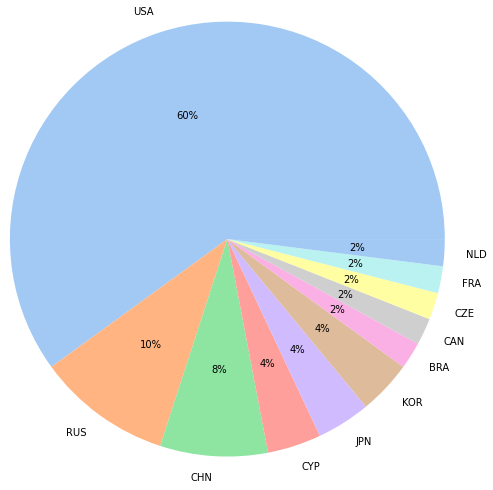

In [41]:
#Pie chart of the country porportion 
dfPlot = data.groupby('country').size().reset_index(name='size').sort_values(by='size', ascending=False)
plt.pie(dfPlot['size'], labels=dfPlot['country'], colors=colors, autopct='%.0f%%', radius=2.5)
plt.show()

In [42]:
#Bar Graph
fig = px.bar(data, x='country', text='country', title='Country Counts',height=800,width=1000)
fig.show()